<a href="https://colab.research.google.com/github/rok-seo/PONG_dqn/blob/main/RokSeo_DQN_pong.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming Assignment 3

Make sure to run a GPU instance (runtime -> change runtime type -> hardware acceleration -> GPU) and that "using CUDA" prints in the training script. Before you write any code, make sure you can run up to and including the DQN.py cell. The Test cell should error out with a message about not implementing action (implementing this part is part of your assignment).

# Imports
When you reach the line:

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit

Press the stop button on the cell and it will continue running

In [ ]:
## Install Packages for Rendering
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
!pip install imageio==2.4.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 18.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for imageio: filename=imageio-2.4.1-py3-none-any.whl size=3303885 sha256=fa84b2de4444e3a4d52cacf861bde23d2ca5fb60f75caf683535d715e6467757
  Stored in directory: /root/.cache/pip/wheels/96/5d/ce/bdbdb04744dac03906336eb0d01ff1e222061d3419c55c55f9
Successfully built imageio
  Attempting uninstall: imageio
    Found existing installation: imageio 2.31.6
    Uninstalling imageio-2.31.6:
      Successfully uninstalled imageio-2.31.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
moviepy 1.0.3 requires imageio<3.0,>=2.5; python_version >= "3.4", but you have imageio 2.4.1 which is incompatible.


In [ ]:
!pip install git+https://github.com/MLivanos/colabgymrender.git

  Cloning https://github.com/MLivanos/colabgymrender.git to /tmp/pip-req-build-6szaygyn
  Running command git clone --filter=blob:none --quiet https://github.com/MLivanos/colabgymrender.git /tmp/pip-req-build-6szaygyn
  Resolved https://github.com/MLivanos/colabgymrender.git to commit 8526ad9deec50a445e63b8faf2b894d3b0cd7cd2
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 313.4/313.4 kB 5.4 MB/s eta 0:00:00
  Created wheel for colabgymrender: filename=colabgymrender-1.1.0-py3-none-any.whl size=3121 sha256=1b0d79609146b71c2711e483d3d641a4b25536a148739187b71b7489a3e7ff9c
  Stored in directory: /tmp/pip-ephem-wheel-cache-rrgydrqq/wheels/77/55/8f/c8dc40e3d76a7b3b96deedd7db9049ca77535dea569f555000
Successfully built colabgymrender
  Attempting uninstall: imageio
    Found existing installation: imageio 2.4.1
    Uninstalling imageio-2.4.1:
      Successfully uninstalled imageio-2.4.1


In [ ]:
## Install ROMs
! wget http://www.atarimania.com/roms/Roms.rar
! mkdir /content/ROM/
! unrar e /content/Roms.rar /content/ROM/
! python -m atari_py.import_roms /content/ROM/

--2024-03-24 04:04:58--  http://www.atarimania.com/roms/Roms.rar
Resolving www.atarimania.com (www.atarimania.com)... 212.83.163.6
Connecting to www.atarimania.com (www.atarimania.com)|212.83.163.6|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://www.atarimania.com/roms/Roms.rar [following]
--2024-03-24 04:04:58--  https://www.atarimania.com/roms/Roms.rar
Connecting to www.atarimania.com (www.atarimania.com)|212.83.163.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19612325 (19M) [application/octet-stream]
Saving to: ‘Roms.rar’

Roms.rar            100%[===================>]  18.70M  50.3MB/s    in 0.4s    

2024-03-24 04:04:58 (50.3 MB/s) - ‘Roms.rar’ saved [19612325/19612325]


UNRAR 6.11 beta 1 freeware      Copyright (c) 1993-2022 Alexander Roshal


Extracting from /content/Roms.rar

Extracting  /content/ROM/128 in 1 Game Select ROM (Unknown) ~.bin          0%  OK 
Extracting  /content/ROM/2 in 1

In [ ]:
#!wget https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1
#!pip install gym[atari,accept-rom-license]==0.21.0
!pip install ale-py
!pip install gym[atari,accept-rom-license]
# Example for generating the game replay
import gym
from colabgymrender.recorder import Recorder

#env = gym.make("PongNoFrameskip-v4")
env = gym.make("MsPacmanNoFrameskip-v4")
directory = './video'
env = Recorder(env, directory)

observation = env.reset()
terminal = False
while not terminal:
  action = env.action_space.sample()
  observation, reward, terminal, info = env.step(action)
env.play()

/bin/bash: line 1: pip install ale-py: command not found
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 21.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for AutoROM.accept-rom-license: filename=AutoROM.accept_rom_license-0.6.1-py3-none-any.whl size=446659 sha256=39d8616d5ac6b5a3ebc1c78d5f06ccb4be3dc0ed49c9f7702bf2dd13ea2ad77f
  Stored in directory: /root/.cache/pip/wheels/6b/1b/ef/a43ff1a2f1736d5711faa1ba4c1f61be1131b8899e6a057811
Successfully built AutoROM.accept-rom-license


  np.bool8: (False, True),

  from scipy.ndimage.filters import sobel

  deprecation(

  deprecation(

See here for more information: https://www.gymlibrary.ml/content/api/
  deprecation(

  logger.warn(

  logger.deprecation(

  if not isinstance(done, (bool, np.bool8)):



Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


# Layers.py

In [ ]:
# layers.py
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

class NoisyLinear(nn.Module):
    def __init__(self, in_features, out_features, use_cuda, std_init=0.4):
        super(NoisyLinear, self).__init__()

        self.use_cuda     = use_cuda
        self.in_features  = in_features
        self.out_features = out_features
        self.std_init     = std_init

        self.weight_mu    = nn.Parameter(torch.FloatTensor(out_features, in_features))
        self.weight_sigma = nn.Parameter(torch.FloatTensor(out_features, in_features))
        self.register_buffer('weight_epsilon', torch.FloatTensor(out_features, in_features))

        self.bias_mu    = nn.Parameter(torch.FloatTensor(out_features))
        self.bias_sigma = nn.Parameter(torch.FloatTensor(out_features))
        self.register_buffer('bias_epsilon', torch.FloatTensor(out_features))

        self.reset_parameters()
        self.reset_noise()

    def forward(self, x):
        if self.use_cuda:
            weight_epsilon = self.weight_epsilon.cuda()
            bias_epsilon   = self.bias_epsilon.cuda()
        else:
            weight_epsilon = self.weight_epsilon
            bias_epsilon   = self.bias_epsilon

        if self.training:
            weight = self.weight_mu + self.weight_sigma.mul(Variable(weight_epsilon))
            bias   = self.bias_mu   + self.bias_sigma.mul(Variable(bias_epsilon))
        else:
            weight = self.weight_mu
            bias   = self.bias_mu

        return F.linear(x, weight, bias)

    def reset_parameters(self):
        mu_range = 1 / math.sqrt(self.weight_mu.size(1))

        self.weight_mu.data.uniform_(-mu_range, mu_range)
        self.weight_sigma.data.fill_(self.std_init / math.sqrt(self.weight_sigma.size(1)))

        self.bias_mu.data.uniform_(-mu_range, mu_range)
        self.bias_sigma.data.fill_(self.std_init / math.sqrt(self.bias_sigma.size(0)))

    def reset_noise(self):
        epsilon_in  = self._scale_noise(self.in_features)
        epsilon_out = self._scale_noise(self.out_features)

        self.weight_epsilon.copy_(epsilon_out.ger(epsilon_in))
        self.bias_epsilon.copy_(self._scale_noise(self.out_features))

    def _scale_noise(self, size):
        x = torch.randn(size)
        x = x.sign().mul(x.abs().sqrt())
        return x

# Wrappers.py

In [ ]:
import numpy as np
from collections import deque
import gym
from gym import spaces
import cv2
cv2.ocl.setUseOpenCL(False)

class NoopResetEnv(gym.Wrapper):
    def __init__(self, env, noop_max=30):
        """Sample initial states by taking random number of no-ops on reset.
        No-op is assumed to be action 0.
        """
        gym.Wrapper.__init__(self, env)
        self.noop_max = noop_max
        self.override_num_noops = None
        self.noop_action = 0
        assert env.unwrapped.get_action_meanings()[0] == 'NOOP'

    def reset(self, **kwargs):
        """ Do no-op action for a number of steps in [1, noop_max]."""
        self.env.reset(**kwargs)
        if self.override_num_noops is not None:
            noops = self.override_num_noops
        else:
            noops = self.unwrapped.np_random.integers(1, self.noop_max + 1) #pylint: disable=E1101
        assert noops > 0
        obs = None
        for _ in range(noops):
            obs, _, done, _ = self.env.step(self.noop_action)
            if done:
                obs = self.env.reset(**kwargs)
        return obs

    def step(self, ac):
        return self.env.step(ac)

class FireResetEnv(gym.Wrapper):
    def __init__(self, env):
        """Take action on reset for environments that are fixed until firing."""
        gym.Wrapper.__init__(self, env)
        assert env.unwrapped.get_action_meanings()[1] == 'FIRE'
        assert len(env.unwrapped.get_action_meanings()) >= 3

    def reset(self, **kwargs):
        self.env.reset(**kwargs)
        obs, _, done, _ = self.env.step(1)
        if done:
            self.env.reset(**kwargs)
        obs, _, done, _ = self.env.step(2)
        if done:
            self.env.reset(**kwargs)
        return obs

    def step(self, ac):
        return self.env.step(ac)

class EpisodicLifeEnv(gym.Wrapper):
    def __init__(self, env):
        """Make end-of-life == end-of-episode, but only reset on true game over.
        Done by DeepMind for the DQN and co. since it helps value estimation.
        """
        gym.Wrapper.__init__(self, env)
        self.lives = 0
        self.was_real_done  = True

    def step(self, action):
        obs, reward, done, info = self.env.step(action)
        self.was_real_done = done
        # check current lives, make loss of life terminal,
        # then update lives to handle bonus lives
        lives = self.env.unwrapped.ale.lives()
        if lives < self.lives and lives > 0:
            # for Qbert sometimes we stay in lives == 0 condtion for a few frames
            # so its important to keep lives > 0, so that we only reset once
            # the environment advertises done.
            done = True
        self.lives = lives
        return obs, reward, done, info

    def reset(self, **kwargs):
        """Reset only when lives are exhausted.
        This way all states are still reachable even though lives are episodic,
        and the learner need not know about any of this behind-the-scenes.
        """
        if self.was_real_done:
            obs = self.env.reset(**kwargs)
        else:
            # no-op step to advance from terminal/lost life state
            obs, _, _, _ = self.env.step(0)
        self.lives = self.env.unwrapped.ale.lives()
        return obs

class MaxAndSkipEnv(gym.Wrapper):
    def __init__(self, env, skip=4):
        """Return only every `skip`-th frame"""
        gym.Wrapper.__init__(self, env)
        # most recent raw observations (for max pooling across time steps)
        self._obs_buffer = np.zeros((2,)+env.observation_space.shape, dtype=np.uint8)
        self._skip       = skip

    def reset(self):
        return self.env.reset()

    def step(self, action):
        """Repeat action, sum reward, and max over last observations."""
        total_reward = 0.0
        done = None
        for i in range(self._skip):
            obs, reward, done, info = self.env.step(action)
            if i == self._skip - 2: self._obs_buffer[0] = obs
            if i == self._skip - 1: self._obs_buffer[1] = obs
            total_reward += reward
            if done:
                break
        # Note that the observation on the done=True frame
        # doesn't matter
        max_frame = self._obs_buffer.max(axis=0)

        return max_frame, total_reward, done, info

    def reset(self, **kwargs):
        return self.env.reset(**kwargs)

class ClipRewardEnv(gym.RewardWrapper):
    def __init__(self, env):
        gym.RewardWrapper.__init__(self, env)

    def reward(self, reward):
        """Bin reward to {+1, 0, -1} by its sign."""
        return np.sign(reward)

class WarpFrame(gym.ObservationWrapper):
    def __init__(self, env):
        """Warp frames to 84x84 as done in the Nature paper and later work."""
        gym.ObservationWrapper.__init__(self, env)
        self.width = 84
        self.height = 84
        self.observation_space = spaces.Box(low=0, high=255,
            shape=(self.height, self.width, 1), dtype=np.uint8)

    def observation(self, frame):
        frame = cv2.cvtColor(frame, cv2.COLOR_RGB2GRAY)
        frame = cv2.resize(frame, (self.width, self.height), interpolation=cv2.INTER_AREA)
        return frame[:, :, None]

class FrameStack(gym.Wrapper):
    def __init__(self, env, k):
        """Stack k last frames.
        Returns lazy array, which is much more memory efficient.
        See Also
        --------
        baselines.common.atari_wrappers.LazyFrames
        """
        gym.Wrapper.__init__(self, env)
        self.k = k
        self.frames = deque([], maxlen=k)
        shp = env.observation_space.shape
        self.observation_space = spaces.Box(low=0, high=255, shape=(shp[0], shp[1], shp[2] * k), dtype=np.uint8)

    def reset(self):
        ob = self.env.reset()
        for _ in range(self.k):
            self.frames.append(ob)
        return self._get_ob()

    def step(self, action):
        ob, reward, done, info = self.env.step(action)
        self.frames.append(ob)
        return self._get_ob(), reward, done, info

    def _get_ob(self):
        assert len(self.frames) == self.k
        return LazyFrames(list(self.frames))

class ScaledFloatFrame(gym.ObservationWrapper):
    def __init__(self, env):
        gym.ObservationWrapper.__init__(self, env)

    def observation(self, observation):
        # careful! This undoes the memory optimization, use
        # with smaller replay buffers only.
        return np.array(observation).astype(np.float32) / 255.0

class LazyFrames(object):
    def __init__(self, frames):
        """This object ensures that common frames between the observations are only stored once.
        It exists purely to optimize memory usage which can be huge for DQN's 1M frames replay
        buffers.
        This object should only be converted to numpy array before being passed to the model.
        You'd not believe how complex the previous solution was."""
        self._frames = frames
        self._out = None

    def _force(self):
        if self._out is None:
            self._out = np.concatenate(self._frames, axis=2)
            self._frames = None
        return self._out

    def __array__(self, dtype=None):
        out = self._force()
        if dtype is not None:
            out = out.astype(dtype)
        return out

    def __len__(self):
        return len(self._force())

    def __getitem__(self, i):
        return self._force()[i]

def make_atari(env_id):
    env = gym.make(env_id)
    assert 'NoFrameskip' in env.spec.id
    env = NoopResetEnv(env, noop_max=30)
    env = MaxAndSkipEnv(env, skip=4)
    return env

def wrap_deepmind(env, episode_life=True, clip_rewards=True, frame_stack=False, scale=False):
    """Configure environment for DeepMind-style Atari.
    """
    if episode_life:
        env = EpisodicLifeEnv(env)
    if 'FIRE' in env.unwrapped.get_action_meanings():
        env = FireResetEnv(env)
    env = WarpFrame(env)
    if scale:
        env = ScaledFloatFrame(env)
    if clip_rewards:
        env = ClipRewardEnv(env)
    if frame_stack:
        env = FrameStack(env, 4)
    return env



class ImageToPyTorch(gym.ObservationWrapper):
    """
    Image shape to num_channels x weight x height
    """
    def __init__(self, env):
        super(ImageToPyTorch, self).__init__(env)
        old_shape = self.observation_space.shape
        self.observation_space = gym.spaces.Box(low=0.0, high=1.0, shape=(old_shape[-1], old_shape[0], old_shape[1]), dtype=np.uint8)

    def observation(self, observation):
        return np.swapaxes(observation, 2, 0)


def wrap_pytorch(env):
    return ImageToPyTorch(env)

# DQN.py

In [ ]:
from collections import deque
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.autograd as autograd
import math, random
USE_CUDA = torch.cuda.is_available()
Variable = lambda *args, **kwargs: autograd.Variable(*args, **kwargs).cuda() if USE_CUDA else autograd.Variable(*args, **kwargs)

class QLearner(nn.Module):
    def __init__(self, env, num_frames, batch_size, gamma, replay_buffer):
        super(QLearner, self).__init__()
        self.batch_size = batch_size
        self.gamma = gamma
        self.num_frames = num_frames
        self.replay_buffer = replay_buffer
        self.env = env
        self.input_shape = self.env.observation_space.shape
        self.num_actions = self.env.action_space.n
        self.features = nn.Sequential(
            nn.Conv2d(self.input_shape[0], 32, kernel_size=8, stride=4),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=4, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, 64, kernel_size=3, stride=1),
            nn.ReLU()
        )
        self.fc = nn.Sequential(
            nn.Linear(self.feature_size(), 512),
            nn.ReLU(),
            nn.Linear(512, self.num_actions)
        )

    def forward(self, x):
        x = self.features(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

    def feature_size(self):
            return self.features(autograd.Variable(torch.zeros(1, *self.input_shape))).view(1, -1).size(1)

    def act(self, state, epsilon):
        if random.random() > epsilon:
            state = Variable(torch.FloatTensor(np.float32(state)).unsqueeze(0), requires_grad=True)
            q_values = self.forward(state)
            action = torch.argmax(q_values).item()


        else:
            action = random.randrange(self.env.action_space.n)
        return action

    def copy_from(self, target):
        self.load_state_dict(target.state_dict())


def compute_td_loss(model, target_model, batch_size, gamma, replay_buffer):
    state, action, reward, next_state, done = replay_buffer.sample(batch_size)
    state = Variable(torch.FloatTensor(np.float32(state)))
    next_state = Variable(torch.FloatTensor(np.float32(next_state)), requires_grad=True)
    action = Variable(torch.LongTensor(action))
    reward = Variable(torch.FloatTensor(reward))
    done = Variable(torch.FloatTensor(done))

    q_values = model(state)
    next_q_values = target_model(next_state)

    q_value = q_values.gather(1, action.unsqueeze(1)).squeeze(1)
    next_q_value = next_q_values.detach().cpu().max(1)[0]
    target_q_value = reward + gamma * next_q_value.cuda() * (1 - done)

    loss = torch.nn.MSELoss(reduction='sum')(q_value, Variable(target_q_value.data))

    return loss


class ReplayBuffer(object):
    def __init__(self, capacity):
        self.buffer = deque(maxlen=capacity)

    def push(self, state, action, reward, next_state, done):
        state = np.expand_dims(state, 0)
        next_state = np.expand_dims(next_state, 0)
        self.buffer.append((state, action, reward, next_state, done))

    def sample(self, batch_size):

        batch = random.sample(self.buffer, batch_size)
        state, action, reward, next_state, done = zip(*batch)
        state = np.concatenate(state)
        next_state = np.concatenate(next_state)

        return state, action, reward, next_state, done

    def __len__(self):
        return len(self.buffer)

# Test Your Model

Note: Test is intentionally before train because you are provided a pretrained - but imperect - model. You can go back and use this code to test your model after you train it.

In [ ]:
# Test_dqn
import sys
from colabgymrender.recorder import Recorder
import math, random
import gym
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.autograd as autograd
import torch.nn.functional as F
import warnings
warnings.filterwarnings("ignore")
USE_CUDA = torch.cuda.is_available()

env_id = "PongNoFrameskip-v4"
env = make_atari(env_id)
env = wrap_deepmind(env)
env = wrap_pytorch(env)
directory = './video'
env = Recorder(env, directory)

num_frames = 1000000
batch_size = 32
gamma = 0.99

replay_initial = 10000
replay_buffer = ReplayBuffer(100000)
# specify the path of the testing model
from google.colab import drive
drive.mount('/content/drive')
pthname = '/content/drive/My Drive/PongNoFrameskip-v4-model.pth'

model = QLearner(env, num_frames, batch_size, gamma, replay_buffer)
model.load_state_dict(torch.load(pthname, map_location='cpu'))
model.eval()
if USE_CUDA:
    model = model.cuda()
    print("Using cuda")

env.seed(1)
state = env.reset()
done = False
games_won = 0

while not done:
    action = model.act(state, 0)
    state, reward, done, _ = env.step(action)
    if reward != 0:
        print(reward)
    if reward == 1:
        games_won += 1

print("Points Won: {}".format(games_won))
env.play()
try:
    sys.exit(0)
except:
    pass

Mounted at /content/drive
Using cuda
-1.0
-1.0
1.0
1.0
-1.0
-1.0
-1.0
1.0
-1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
1.0
-1.0
-1.0
1.0
1.0
1.0
-1.0
-1.0
1.0
1.0
1.0
Points Won: 21
Moviepy - Building video temp-{start}.mp4.
Moviepy - Writing video temp-{start}.mp4



Moviepy - Done !
Moviepy - video ready temp-{start}.mp4


# Train your Model

In [ ]:
# run_dqn (train your model)
import math, random
import gym
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torch.autograd as autograd
import torch.nn.functional as F
USE_CUDA = torch.cuda.is_available()

env_id = "PongNoFrameskip-v4"
env = make_atari(env_id)
env = wrap_deepmind(env)
env = wrap_pytorch(env)

num_frames = 1000000
batch_size = 32
gamma = 0.99
record_idx = 10000

replay_initial = 10000
replay_buffer = ReplayBuffer(100000)
model = QLearner(env, num_frames, batch_size, gamma, replay_buffer)

# specify the path of the testing model
from google.colab import drive
drive.mount('/content/drive')
pthname = '/content/drive/My Drive/model_pretrained.pth'
model.load_state_dict(torch.load(pthname, map_location='cpu'))

target_model = QLearner(env, num_frames, batch_size, gamma, replay_buffer)
target_model.copy_from(model)

optimizer = optim.Adam(model.parameters(), lr=0.00001)
if USE_CUDA:
    model = model.cuda()
    target_model = target_model.cuda()
    print("Using cuda")

epsilon_start = 1.0
epsilon_final = 0.01
epsilon_decay = 30000
epsilon_by_frame = lambda frame_idx: epsilon_final + (epsilon_start - epsilon_final) * math.exp(-1. * frame_idx / epsilon_decay)

losses = []
all_rewards = []
episode_reward = 0

state = env.reset()

for frame_idx in range(1, num_frames + 1):


    if frame_idx % 10000 == 0:
      torch.save(model.state_dict(), './halfway_model.pth')

    epsilon = epsilon_by_frame(frame_idx)
    action = model.act(state, epsilon)

    next_state, reward, done, _ = env.step(action)
    replay_buffer.push(state, action, reward, next_state, done)

    state = next_state
    episode_reward += reward

    if done:
        state = env.reset()
        all_rewards.append((frame_idx, episode_reward))
        episode_reward = 0

    if len(replay_buffer) > replay_initial:
        loss = compute_td_loss(model, target_model, batch_size, gamma, replay_buffer)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append((frame_idx, loss.data.cpu().numpy()))

    if frame_idx % 10000 == 0 and len(replay_buffer) <= replay_initial:
        print('#Frame: %d, preparing replay buffer' % frame_idx)

    if frame_idx % 10000 == 0 and len(replay_buffer) > replay_initial:
        print('#Frame: %d, Loss: %f' % (frame_idx, np.mean(losses, 0)[1]))
        print('Last-10 average reward: %f' % np.mean(all_rewards[-10:], 0)[1])

    if frame_idx % 50000 == 0:
        target_model.copy_from(model)

# set your model path
saved_path = "/content/drive/My Drive/" + env_id + "-model.pth"
# save your final model
torch.save(model.state_dict(), saved_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Using cuda
#Frame: 10000, preparing replay buffer
#Frame: 20000, Loss: 0.015790
Last-10 average reward: -18.200000
#Frame: 30000, Loss: 0.011656
Last-10 average reward: -17.900000
#Frame: 40000, Loss: 0.010023
Last-10 average reward: -17.500000
#Frame: 50000, Loss: 0.009221
Last-10 average reward: -16.900000
#Frame: 60000, Loss: 0.011087
Last-10 average reward: -15.400000
#Frame: 70000, Loss: 0.011443
Last-10 average reward: -13.700000
#Frame: 80000, Loss: 0.011442
Last-10 average reward: -10.600000
#Frame: 90000, Loss: 0.011220
Last-10 average reward: -9.700000
#Frame: 100000, Loss: 0.011019
Last-10 average reward: -10.800000
#Frame: 110000, Loss: 0.012583
Last-10 average reward: -11.000000
#Frame: 120000, Loss: 0.013402
Last-10 average reward: -9.500000
#Frame: 130000, Loss: 0.013903
Last-10 average reward: -7.800000
#Frame: 140000, Loss: 0.014214
Last-10 a

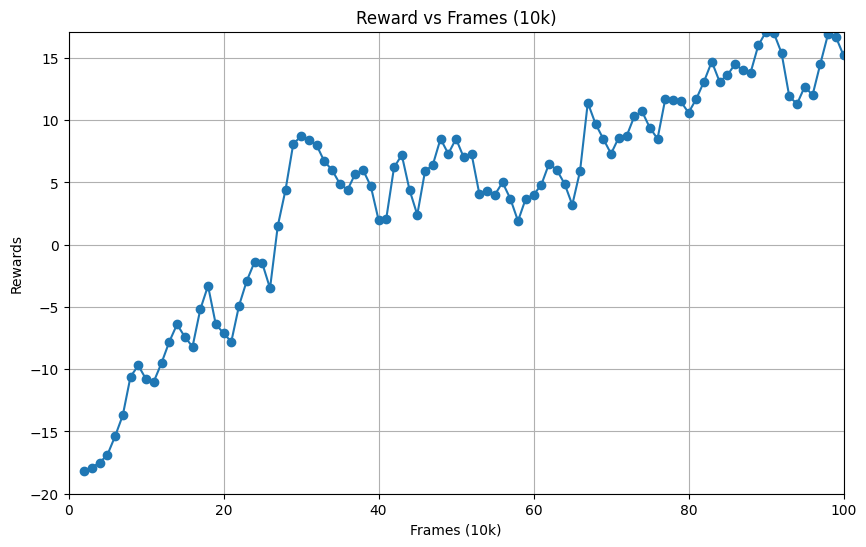

In [ ]:
import matplotlib.pyplot as plt

frames = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
rewards = [-18.2, -17.9, -17.5, -16.9, -15.4, -13.7, -10.6, -9.7, -10.8, -11.0, -9.5, -7.8, -6.4, -7.4, -8.2, -5.2, -3.3, -6.4, -7.1, -7.8, -4.9, -2.9, -1.4, -1.5, -3.5, 1.5, 4.4, 8.1, 8.7, 8.4, 8.0, 6.7, 6.0, 4.9, 4.4, 5.7, 6.0, 4.7, 2.0, 2.1, 6.2, 7.2, 4.4, 2.4, 5.9, 6.4, 8.5, 7.3, 8.5, 7.0, 7.3, 4.1, 4.3, 4.0, 5.0, 3.7, 1.9, 3.7, 4.0, 4.8, 6.5, 6.0, 4.9, 3.2, 5.9, 11.4, 9.7, 8.5, 7.3, 8.6, 8.7, 10.3, 10.7, 9.4, 8.5, 11.7, 11.6, 11.5, 10.6, 11.7, 13.1, 14.7, 13.1, 13.6, 14.5, 14.0, 13.8, 16.0, 17.1, 17.0, 15.4, 11.9, 11.3, 12.7, 12.0, 14.5, 16.9, 16.7, 15.2]

plt.figure(figsize=(10, 6))
plt.plot(frames, rewards, marker='o', linestyle='-')
plt.xlim(0, max(frames))
plt.ylim(-20, max(rewards))
plt.title('Reward vs Frames (10k)')
plt.xlabel('Frames (10k)')
plt.ylabel('Rewards')
plt.grid(True)
plt.show()


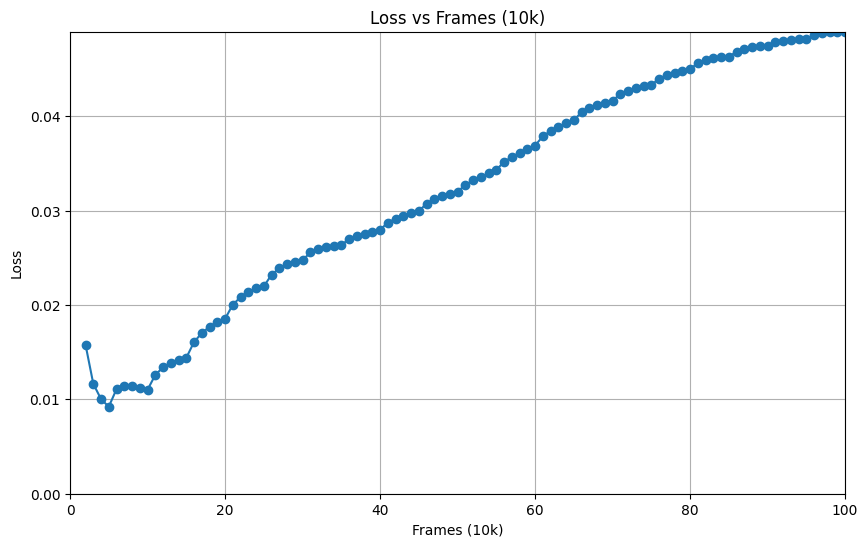

In [ ]:
import matplotlib.pyplot as plt

frames = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
loss = [0.01579, 0.011656, 0.010023, 0.009221, 0.011087, 0.011443, 0.011442, 0.01122, 0.011019, 0.012583, 0.013402, 0.013903, 0.014214, 0.014402, 0.01607, 0.017031, 0.017688, 0.018165, 0.018526, 0.020033, 0.020833, 0.021383, 0.021756, 0.021968, 0.023203, 0.023894, 0.02431, 0.024563, 0.024745, 0.025564, 0.025932, 0.026136, 0.026282, 0.026351, 0.026991, 0.027292, 0.027519, 0.027735, 0.027961, 0.028736, 0.029143, 0.029457, 0.029703, 0.029946, 0.030742, 0.031201, 0.03156, 0.031806, 0.031996, 0.032732, 0.033198, 0.033588, 0.03394, 0.03432, 0.035168, 0.03568, 0.03614, 0.036573, 0.036902, 0.037864, 0.038445, 0.038874, 0.039262, 0.039585, 0.040434, 0.040886, 0.041213, 0.041453, 0.041657, 0.042353, 0.042711, 0.042964, 0.043159, 0.043304, 0.043993, 0.044358, 0.044638, 0.044834, 0.045015, 0.04562, 0.045951, 0.04615, 0.046269, 0.046292, 0.046857, 0.047181, 0.047342, 0.047437, 0.047458, 0.047871, 0.048004, 0.048108, 0.048151, 0.048159, 0.048649, 0.048853, 0.048942, 0.048961, 0.048957]


plt.figure(figsize=(10, 6))
plt.plot(frames, loss, marker='o', linestyle='-')
plt.xlim(0, max(frames))
plt.ylim(0, max(loss))
plt.title('Loss vs Frames (10k)')
plt.xlabel('Frames (10k)')
plt.ylabel('Loss')
plt.grid(True)
plt.show()